## Final Project Submission

* Kulle Omer 
* Full time
* October 4th, 2019 4PM
* Howard Smith 
* Blog post URL: https://medium.com/@kulleomer/why-i-decided-to-learn-data-science-96862b2819ce?sk=e370747e94a456bdfb55ad7c757a5aed


## Introduction
We are putting our fresh data science skills to use with this Kings County dataset project. First, we will use our knowledge to import the data into this notebook, clean the data, visualize it, and lastly model it with a multivariate regression line to predict the sale prices of houses as accurately as possible. 

The questions we will be answering with our data consist of:
    <br> 1) Does location affect the sale price of houses in Kings County?
    <br> 2) Does time of year affect the sale price of house in Kings County?
    <br> 3) What feature(s) most significantly affect the sale prices of houses in Kings County?

## Part 1: Import the Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('kc_house_data.csv')
#importing libraries and .csv file into the notebook

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.head() #obtain first 5 rows of data into a DataFrame

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df.shape) #obtain the number of rows and columns 

(21597, 21)


In [5]:
df.info() #obtain summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.isna().any() #finding columns with missing values

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.isna().sum() #finding the amount of missing data in each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Part 2: Time to Clean

In [8]:
# waterfront seems like a categorical variable that doesn't represent a continuous number. 
# running this code will allow me to see values in this dataset. 
# I will run this same code on the condition, grade, and view and datasets.
print(df.waterfront.describe()) 
print(df.waterfront.unique())
# values 0 and 1 tell me that it is true or false to have a waterfront

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64
[nan  0.  1.]


In [9]:
print(df.condition.describe()) 
print(df.condition.unique())
# This shows that this dataset is categorical and the values of it range from 1-5. 

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64
[3 5 4 1 2]


In [10]:
print(df.grade.describe()) 
print(df.grade.unique())
# This shows the grade dataset has values ranging from 1-13, and is indeed categorical.

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64
[ 7  6  8 11  9  5 10 12  4  3 13]


In [11]:
# to make things easier I will convert all 3 of the datatypes above into strings.
df.waterfront = df.waterfront.astype('str')
df.condition = df.condition.astype('str')
df.grade = df.grade.astype('str')

In [12]:
# now, since the "view" is the amount of times a house has been viewed, it cannot be a float and must be changed into an int.
print(df.view.unique())
print(df.view.value_counts())
print(df.view.isna().sum())

[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
63


In [13]:
# we have 63 NaN values, so we must replace them all with 0
df.view.fillna(0, inplace=True)

In [14]:
print(df.view.unique())

[0. 3. 4. 2. 1.]


In [15]:
# we are converting "view" to an int
df.view = df.view.astype('int64')

In [16]:
# yr_renovated is also a float and should be converted to an int
print(df.yr_renovated.unique())
print()
# we are also going to compare the statistics of "yr_renovated" and "yr_built"
subsets = ['yr_built', 'yr_renovated']
df[subsets].describe()

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]



,yr_built,yr_renovated
count,21597.000000,17755.000000
mean,1970.999676,83.636778
std,29.375234,399.946414
min,1900.000000,0.000000
25%,1951.000000,0.000000
50%,1975.000000,0.000000
75%,1997.000000,0.000000
max,2015.000000,2015.000000


In [17]:
# lets check how many missing values the "yr_renovated" column has
df.yr_renovated.isna().sum()

3842

In [18]:
# lets bin a new category for the houses with null values in "yr_renovated" 
# we're going to assume that these values mean that they were never renovated.
bins = [0., 1950., 1980., 1990., 2000., 2015.]
names = ['no_reno', 'before 1980', '1980-1989', '1990-1999', '2000-2015']
df['reno_year'] = pd.cut(df['yr_renovated'], bins, labels=names, right=False)

print(df.reno_year.unique())
print(df.reno_year.value_counts())

[no_reno, 1990-1999, NaN, 2000-2015, before 1980, 1980-1989]
Categories (5, object): [no_reno < before 1980 < 1980-1989 < 1990-1999 < 2000-2015]
no_reno        17020
2000-2015        365
1990-1999        143
1980-1989        124
before 1980       89
Name: reno_year, dtype: int64


In [19]:
# now lets check all null values we have
df.reno_year.isna().sum()

3856

In [20]:
# here we are going to replace these null values to "no_reno"
df.reno_year.fillna('no_reno', inplace=True)
print(df.reno_year.value_counts())

no_reno        20876
2000-2015        365
1990-1999        143
1980-1989        124
before 1980       89
Name: reno_year, dtype: int64


In [21]:
# finally, lets see if all that worked!
df.reno_year.isna().sum()

0

In [22]:
# so the category "sqft_basement" is a string but we know that square ft is a number or int
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [23]:
# there were question marks in the data that may have caused it to be a string. 
# we are going to query through the data and see how many question marks there are
len(df.query("sqft_basement == '?'"))

454

In [24]:
# here we are going to replace all the question marks to 0.
df.sqft_basement.replace(['?'], '0', inplace=True)

In [25]:
# here we are going to change it to a float and int
df.sqft_basement = df.sqft_basement.astype('float').astype('int')

In [26]:
# lets check if it worked
print(df.sqft_basement.unique())

[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2600 1690  243 1210 1024 1798 1610 1440 1570 1650  704 1910
 1630 

In [27]:
# lets also double check all the datatypes to see if everything is intact
print(df.dtypes)

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront         object
view                int64
condition          object
grade              object
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
reno_year        category
dtype: object


In [28]:
# lets also see if we have any null values
print(df.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
reno_year           0
dtype: int64


In [29]:
# now we are going to check for multicollinearity and correlation 
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,nan,0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,no_reno


In [30]:
# we are going to disregard the columns id, date, and price
df_preds = df.iloc[:,3:]
df_target = df.iloc[:,2:3]

df_preds.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year
0,3,1.0,1180,5650,1.0,nan,0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,no_reno


In [31]:
#checking for correlation
df_preds.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.166017,0.270629,-0.054452,0.100977,0.085059,0.006321,-0.077702,0.278928,0.073083
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,1.000000,-0.051175,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.241866,0.270629,-0.051175,1.000000,-0.130085,0.071190,0.073271,0.109853,-0.142369,0.199288,0.015885
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.054452,0.424037,-0.130085,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.018495,0.051050,0.055660,0.004513,0.003535,0.100977,0.022137,0.071190,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [32]:
abs(df_preds.corr()) > 0.7 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


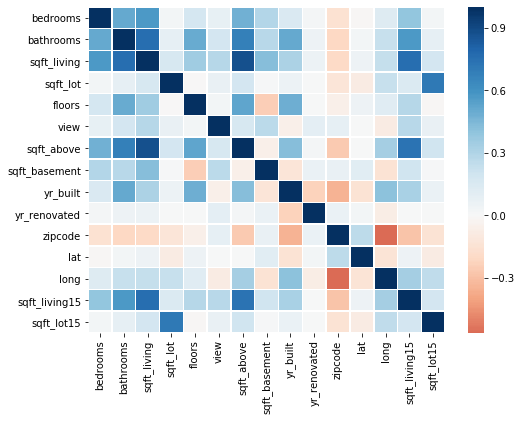

In [33]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_preds.corr(), center=0, linewidths=.5, cmap="RdBu");
# i am using the heatmap to check for correlation between the datasets
# i am also trying to see which columns i should drop

In [34]:
# I used 0.7 as a means to find a strong correlation
# I am going to drop id, date, zipcode ,latitude, sqft_above, yr_renovated, sqft_lot15 and longitude since I don't feel them necessary

In [35]:
# I am writing a function solely for dropping columns
def drop_cols(columns, df):
    return df.drop(columns, axis=1, inplace=True)

In [36]:
# now i will use the function to drop the said columns except for bathrooms because i still think it is useful
df = df.drop(columns=['sqft_above', 'sqft_living15'], axis=1)

df = df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_lot15,reno_year
0,221900.0,3,1.00,1180,5650,1.0,nan,0,3,7,0,1955,5650,no_reno
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,400,1951,7639,1990-1999
2,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,0,1933,8062,no_reno
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,910,1965,5000,no_reno
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,0,1987,7503,no_reno


In [37]:
# i am going to create a subset of values that are numerical
subsets = ['price', 'bathrooms', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 
           'yr_built', 'sqft_living']
# here i will round the subsets' statistical values to better understand them
data_descriptives = round(df[subsets].describe(), 3)
data_descriptives

,price,bathrooms,bedrooms,sqft_lot,floors,view,sqft_basement,yr_built,sqft_living
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,2.116,3.373,15099.409,1.494,0.233,285.717,1971.000,2080.322
std,367368.140,0.769,0.926,41412.637,0.540,0.765,439.820,29.375,918.106
min,78000.000,0.500,1.000,520.000,1.000,0.000,0.000,1900.000,370.000
25%,322000.000,1.750,3.000,5040.000,1.000,0.000,0.000,1951.000,1430.000
50%,450000.000,2.250,3.000,7618.000,1.500,0.000,0.000,1975.000,1910.000
75%,645000.000,2.500,4.000,10685.000,2.000,0.000,550.000,1997.000,2550.000
max,7700000.000,8.000,33.000,1651359.000,3.500,4.000,4820.000,2015.000,13540.000


## Part 3: Visualize!

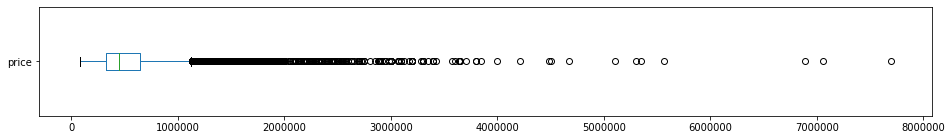

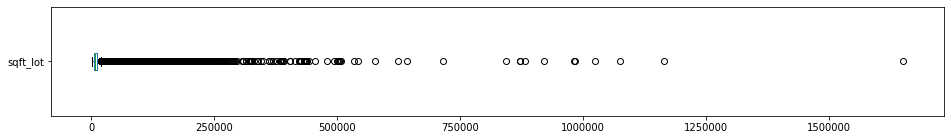

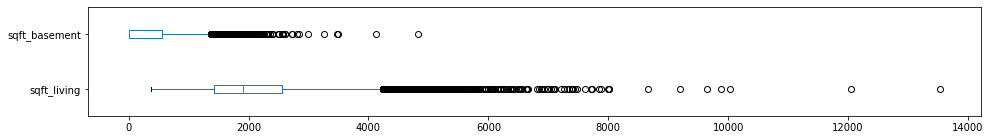

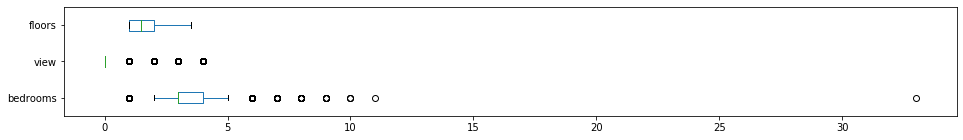

In [38]:
# lets do some visualizations to explore the data. 
# i am looking to see if there are any outliers and other statistical info for the numerical datasets
df[['price']].plot(kind='box', vert=False, figsize=(16,2));
df[['sqft_lot']].plot(kind='box', vert=False, figsize=(16,2));
df[['sqft_living', 'sqft_basement']].plot(kind='box', vert=False, figsize=(16,2));
df[['bedrooms', 'view', 'floors']].plot(kind='box', vert=False, figsize=(16,2));

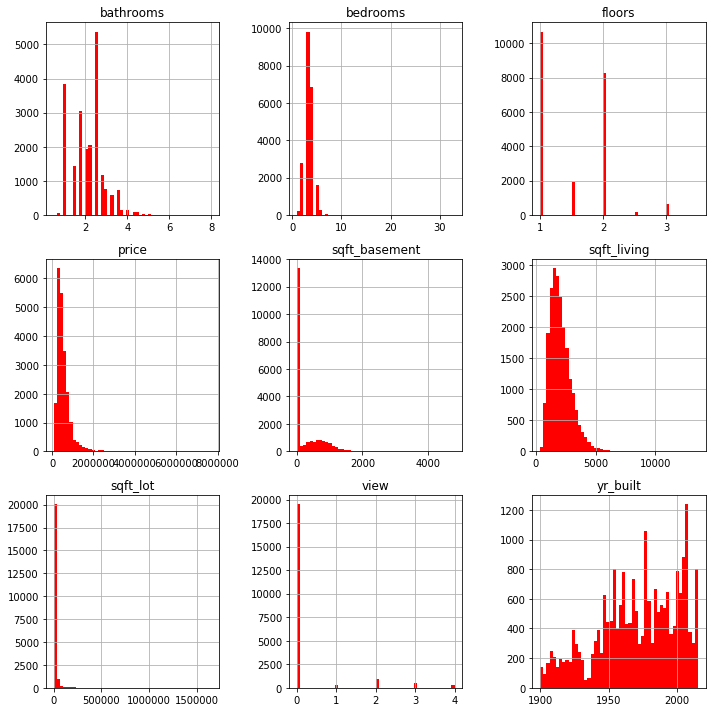

In [39]:
fig = df[subsets].hist(bins=50, color='red', figsize=(10,10), grid=True)
plt.tight_layout();
# histograms

In [40]:
# none of the histograms above are normally distributed 
# next, we will be looking for multicollinearity within the data

In [41]:
col1 = ['floors', 'bedrooms', 'bathrooms', 'sqft_lot', 'price']
col2 = ['condition', 'grade', 'sqft_basement', 'yr_built', 'reno_year', 'price']

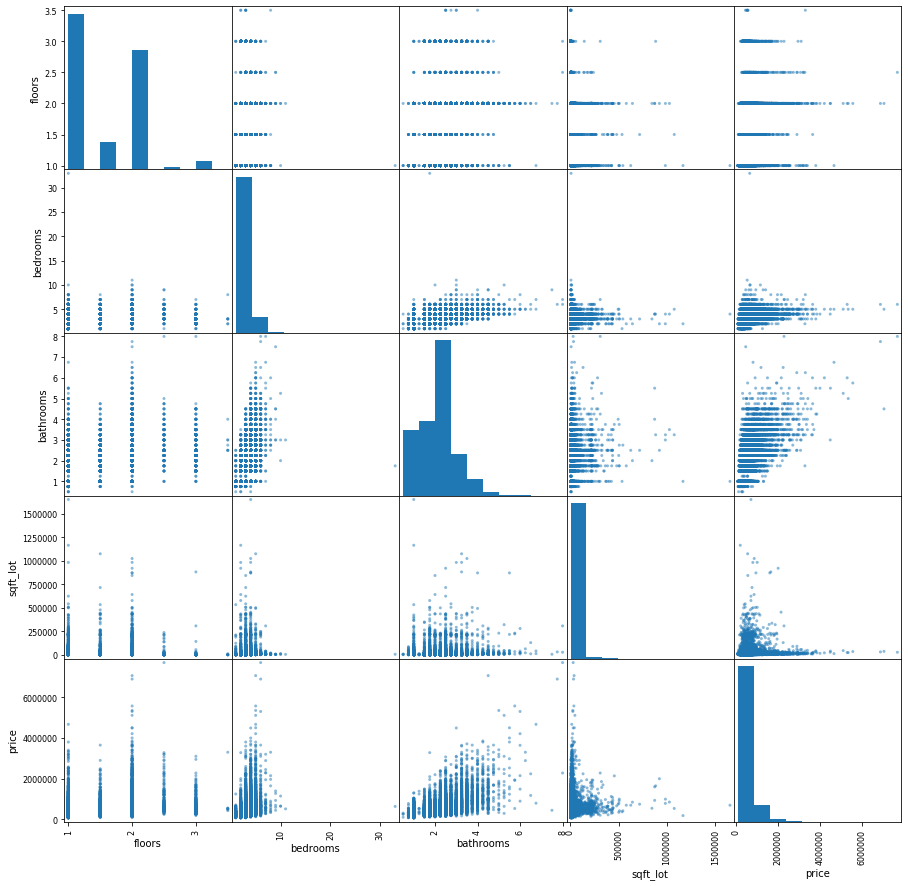

In [42]:
pd.plotting.scatter_matrix(df[col1], figsize=(15,15));
# using a scatter matrix will allow us to look for a relationship between two predictors.

In [43]:
numbers_df = df[['sqft_living', 'sqft_lot', 'sqft_basement']]
numbers2_df = df[['bedrooms', 'bathrooms', 'floors', 'view', 'yr_built']]

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_numb = scaler.fit_transform(numbers_df)
scaled_numbers_df = pd.DataFrame(norm_numb, columns=['sqft_living', 'sqft_lot', 'sqft_basement'])

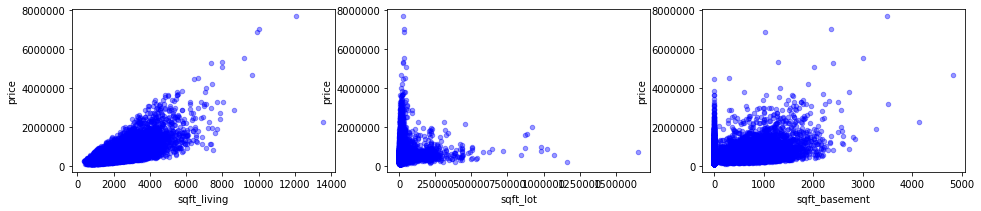

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [46]:
# sqft_living certainly shows linear regression
# we'll explore this later 

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_numb = scaler.fit_transform(numbers2_df)
scaled_numbers_df = pd.DataFrame(norm_numb, columns=['bedrooms', 'bathrooms', 'floors', 'view', 'yr_built'])

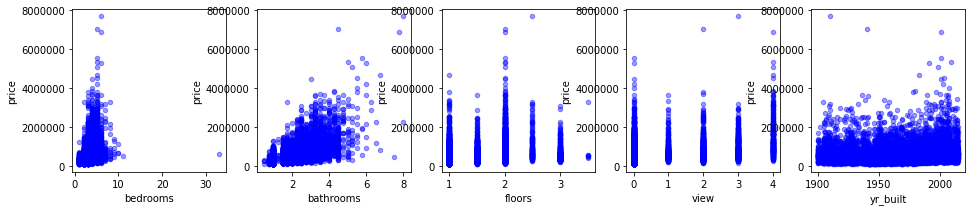

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'view', 'yr_built'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [49]:
# bathrooms looks like it has some type of regression as well, but we need to explore it a bit more
# i am kind of curious about the floors column and why it showed similar to other categorical values such as view?
# we will visualize these categorical datasets

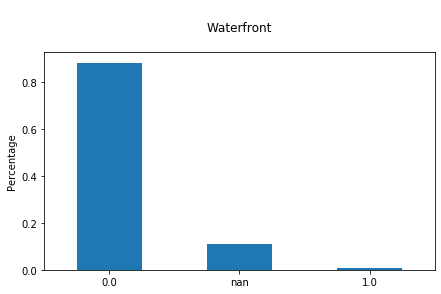

In [50]:
df.waterfront.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nWaterfront\n", figsize=(7,4))
plt.ylabel('Percentage');

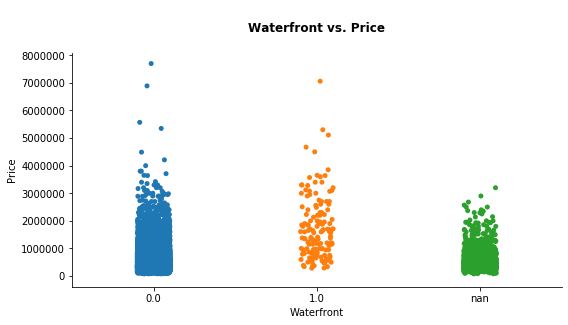

In [51]:
sns.catplot(x="waterfront", y="price", data=df, height=4, aspect=2)
plt.title('\nWaterfront vs. Price\n', fontweight='bold')
plt.xlabel('Waterfront')
plt.ylabel('Price');

In [52]:
# it seems like houses with waterfronts are pricier

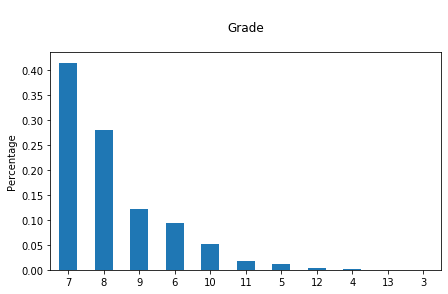

In [53]:
df.grade.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                   title="\nGrade\n", figsize=(7,4))
plt.ylabel('Percentage');

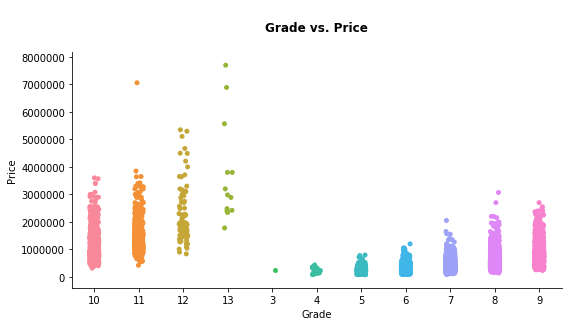

In [54]:
sns.catplot(x="grade", y="price", data=df, height=4, aspect=2)
plt.title('\nGrade vs. Price\n', fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Price');

In [55]:
# it looks like houses that cost more have higher grades.
# a grade is based on inspections.

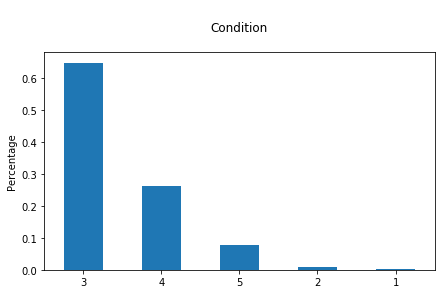

In [56]:
df.condition.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                   title="\nCondition\n", figsize=(7,4))
plt.ylabel('Percentage');

In [57]:
# a house in a better condition will of course cost more.

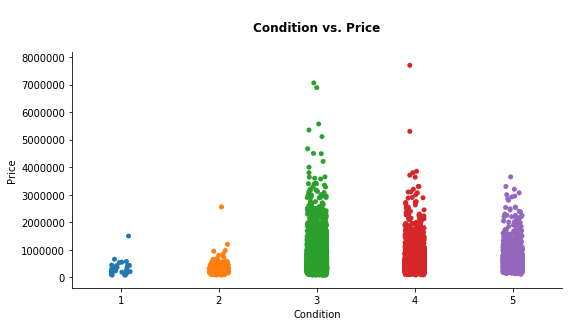

In [58]:
sns.catplot(x="condition", y="price", data=df, height=4, aspect=2)
plt.title('\nCondition vs. Price\n', fontweight='bold')
plt.xlabel('Condition')
plt.ylabel('Price');

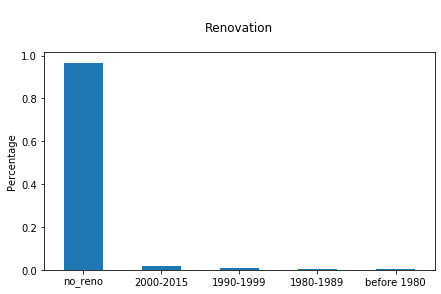

In [59]:
df.reno_year.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nRenovation\n", figsize=(7,4))
plt.ylabel('Percentage');

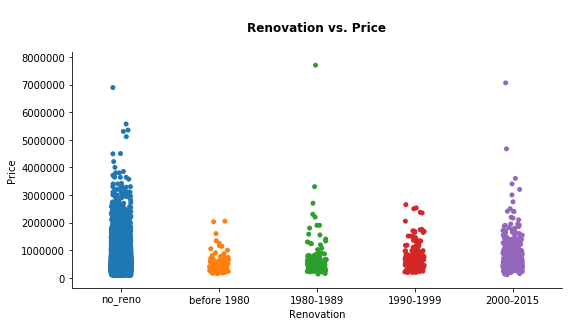

In [60]:
sns.catplot(x="reno_year", y="price", data=df, height=4, aspect=2)
plt.title('\nRenovation vs. Price\n', fontweight='bold')
plt.xlabel('Renovation')
plt.ylabel('Price');

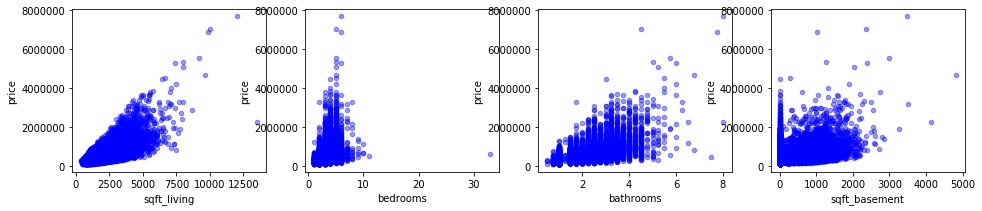

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bedrooms', 'bathrooms', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [62]:
df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
view             21597 non-null int64
condition        21597 non-null category
grade            21597 non-null category
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
sqft_lot15       21597 non-null int64
reno_year        21597 non-null category
dtypes: category(4), float64(3), int64(7)
memory usage: 1.7 MB


## Part 5: Model!

In [63]:
waterfront_dum = pd.get_dummies(df['waterfront'], prefix='wat_front', drop_first=True)
condition_dum = pd.get_dummies(df['condition'], prefix='condition_dum', drop_first=True)
grade_dum = pd.get_dummies(df['grade'], prefix='grade_dum', drop_first=True)
reno_year_dum = pd.get_dummies(df['reno_year'], prefix='reno_yr', drop_first=True)
# allowing model to recognize numbers other than 0 and 1.

In [64]:
df = df.drop(['waterfront', 'condition', 'grade', 'reno_year'], axis=1)

In [65]:
df = pd.concat([df, waterfront_dum, condition_dum, grade_dum, reno_year_dum], axis=1)
df.columns
df.info()
# concatenate the dummy variable columns onto the original dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
view                   21597 non-null int64
sqft_basement          21597 non-null int64
yr_built               21597 non-null int64
sqft_lot15             21597 non-null int64
wat_front_1.0          21597 non-null uint8
wat_front_nan          21597 non-null uint8
condition_dum_2        21597 non-null uint8
condition_dum_3        21597 non-null uint8
condition_dum_4        21597 non-null uint8
condition_dum_5        21597 non-null uint8
grade_dum_11           21597 non-null uint8
grade_dum_12           21597 non-null uint8
grade_dum_13           21597 non-null uint8
grade_dum_3            21597 non-null uint8
grade

In [66]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_basement','bedrooms', 'bathrooms', 'floors', 'view', 'yr_built']]
# df_cat = df[[waterfront_dum, condition_dum, grade_dum, reno_year_dum]]

In [67]:
from sklearn.linear_model import LinearRegression
#using sklearn to import linear regression

In [68]:
y = df['price']
linreg = LinearRegression()
linreg.fit(df_cont, y);
# looking for the best fit for price

In [69]:
linreg.coef_
# estimated coefficients in linear regression problem

array([ 2.86103420e+02, -3.60576375e-01, -3.52279228e+01, -5.85531011e+04,
        6.42268657e+04,  4.55231505e+04,  8.54412384e+04, -3.06520376e+03])

In [70]:
linreg.intercept_
# independent term in the linear model

5975813.898960503

In [71]:
predictors = df.drop(['price'], axis=1)
predictors.info()
# we are dropping price because it isn't a predictor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
view                   21597 non-null int64
sqft_basement          21597 non-null int64
yr_built               21597 non-null int64
sqft_lot15             21597 non-null int64
wat_front_1.0          21597 non-null uint8
wat_front_nan          21597 non-null uint8
condition_dum_2        21597 non-null uint8
condition_dum_3        21597 non-null uint8
condition_dum_4        21597 non-null uint8
condition_dum_5        21597 non-null uint8
grade_dum_11           21597 non-null uint8
grade_dum_12           21597 non-null uint8
grade_dum_13           21597 non-null uint8
grade_dum_3            21597 non-null uint8
grade_dum_4            21597 non-null uint8
grade_d

In [72]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()
# analyzing the r-squared and p-values

/Users/Kulle/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1596.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:25:11   Log-Likelihood:            -2.9502e+05
No. Observations:               21597   AIC:                         5.901e+05
Df Residuals:                   21567   BIC:                         5.903e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.577e+06   1.39e+05     47.226      0.000     6.3e+06    6.85e+06
bedrooms            -2.506e+04   1994.770    -12.565      0.000    -2.9e+04   -2.12e+04
bathrooms            4.491e+04   3378.388     13.294      0.000    3.83e+04    5.15e+04
sqft_living           131.1249      3.554     36.891      0.000     124.158     138.092
sqft_lot               -0.0232      0.049     -0.473      0.636      -0.120       0.073
floors               4.027e+04   3637.527     11.070      0.000    3.31e+04    4.74e+04
view                 4.281e+04   2147.415     19.937      0.000    3.86e+04     4.7e+04
sqft_basement          26.1618      4.333      6.037      0.000      17.668      34.656
yr_built            -3097.1940     68.900    -44.952      0.000   -3232.243   -2962.145
sqft_lot15             -0.5015      0.075     -6.679      0.000      -0.649      -0.354
wat_front_1.0        5.938e+05   1.87e+04     31.704      0.000    5.57e+05    6.31e+05
wat_front_nan       -2045.7252   4512.092     -0.453      0.650   -1.09e+04    6798.309
condition_dum_2      8644.7814   4.18e+04      0.207      0.836   -7.32e+04    9.05e+04
condition_dum_3      3.328e+04   3.89e+04      0.856      0.392   -4.29e+04    1.09e+05
condition_dum_4      5.411e+04   3.89e+04      1.392      0.164   -2.21e+04     1.3e+05
condition_dum_5      9.406e+04   3.91e+04      2.406      0.016    1.74e+04    1.71e+05
grade_dum_11          2.73e+05   1.23e+04     22.162      0.000    2.49e+05    2.97e+05
grade_dum_12         7.506e+05   2.35e+04     31.929      0.000    7.05e+05    7.97e+05
grade_dum_13         1.942e+06   5.89e+04     32.969      0.000    1.83e+06    2.06e+06
grade_dum_3         -5.726e+05   2.08e+05     -2.758      0.006    -9.8e+05   -1.66e+05
grade_dum_4         -5.349e+05   4.12e+04    -12.980      0.000   -6.16e+05   -4.54e+05
grade_dum_5         -5.511e+05   1.64e+04    -33.521      0.000   -5.83e+05   -5.19e+05
grade_dum_6         -4.993e+05   1.02e+04    -48.987      0.000   -5.19e+05   -4.79e+05
grade_dum_7         -4.198e+05   8441.233    -49.732      0.000   -4.36e+05   -4.03e+05
grade_dum_8         -3.313e+05   7724.515    -42.895      0.000   -3.46e+05   -3.16e+05
grade_dum_9         -1.847e+05   7608.297    -24.271      0.000      -2e+05    -1.7e+05
reno_yr_before 1980 -7.549e+04   2.22e+04     -3.403      0.001   -1.19e+05    -3.2e+04
reno_yr_1980-1989   -6021.4112   1.89e+04     -0.319      0.750   -4.31e+04     3.1e+04
reno_yr_1990-1999    3.405e+04   1.76e+04      1.931      0.053    -511.949    6.86e+04
reno_yr_2000-2015    1.039e+05   1.13e+04      9.167      0.000    8.17e+04    1.26e+05
==============================================================================
Omnibus:                    12333.448   Durbin-Watson:                   1.975
Prob(Omnibus):       

In [73]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included### Feature Selection
# gives us a closer look at the p-vaues
# An R² of 0.682 means that this model explains 68.2% of the variance in the price.

In [74]:
result = stepwise_selection(predictors, df["price"], verbose = True)
print('resulting features:')
print(result)
# the resulting features are all the best p-values

Add  bedrooms                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  wat_front_1.0                  with p-value 0.0
Add  view                           with p-value 5.11228e-137
Add  grade_dum_13                   with p-value 1.72659e-116
Add  grade_dum_11                   with p-value 3.73645e-134
Add  grade_dum_12                   with p-value 1.7573e-168
Add  floors                         with p-value 3.60384e-118
Add  bathrooms                      with p-value 1.89603e-65
Add  grade_dum_9                    with p-value 3.6977e-67
Add  grade_dum_6                    with p-value 1.66478e-34
Add  grade_dum_7                    with p-value 1.3337e-101
Add  grade_dum_8                    with p-value 1.57914e-160
Add  grade_dum_5                    with p-value 5.21469e-220
Add  grade_dum_4                    with p-value 5.11267e-39
Add  sqft_lot15                     with p-value 1.

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = predictors
y = df['price']

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(predictors, df["price"])
# selecting features by considering smaller and smaller sets of features

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
view                   21597 non-null int64
sqft_basement          21597 non-null int64
yr_built               21597 non-null int64
sqft_lot15             21597 non-null int64
wat_front_1.0          21597 non-null uint8
wat_front_nan          21597 non-null uint8
condition_dum_2        21597 non-null uint8
condition_dum_3        21597 non-null uint8
condition_dum_4        21597 non-null uint8
condition_dum_5        21597 non-null uint8
grade_dum_11           21597 non-null uint8
grade_dum_12           21597 non-null uint8
grade_dum_13           21597 non-null uint8
grade_dum_3            21597 non-null uint8
grade

In [77]:
selector.support_
# shape

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [78]:
selector.ranking_


array([17, 14, 24, 27, 19, 15, 25, 20, 26,  1, 21, 22, 18, 13, 12,  2,  1,
        1,  5,  3,  4,  6,  7,  8,  9, 16, 23, 11, 10])

In [79]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[1086022.44406155 1555877.78583992 3186143.92043621]
524625.3103329903


In [80]:
new_columns = X.columns[selector.support_]
linreg.fit(X[new_columns], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
y_hat = linreg.predict(X[new_columns])

In [82]:
SSR = np.sum((y - y_hat)**2)
SST = np.sum((y - np.mean(y))**2)
Rsq = 1 - (float(SSR)) / SST
Rsq_adj = 1 - (1 - Rsq)*(len(y)-1)/(len(y) - X[new_columns].shape[1] - 1)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
test_col = ['grade_dum_11', 'grade_dum_7', 'grade_dum_6', 'wat_front_1.0', 'sqft_living', 'yr_built', 'grade_dum_12', 'grade_dum_13', 'grade_dum_8', 'grade_dum_5', 'grade_dum_9', 'view', 'bathrooms', 'grade_dum_4', 'bedrooms', 'floors', 'condition_dum_5', 'reno_yr_1980-1989', 'sqft_lot', 'sqft_basement', 'condition_dum_4', 'reno_yr_2000-2015', 'grade_dum_3']
X = df[test_col]
y = df.price

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17277, 23) (17277,)
(4320, 23) (4320,)


In [86]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [87]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [88]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 42403052899.902534
Test Mean Squarred Error: 45759741746.98289


In [89]:
model = LinearRegression()
model.fit(X_train, y_train)

# print R²
print("Estimated R²:")
print(linreg.score(X,y))

# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(test_col, linreg.coef_)), columns=['Features', 'Estimated Coefficient'])

Estimated R²:
0.6808188660759094


,Features,Estimated Coefficient
0,grade_dum_11,2.802522e+05
1,grade_dum_7,-4.244789e+05
2,grade_dum_6,-5.061299e+05
3,wat_front_1.0,5.820366e+05
4,sqft_living,1.259414e+02
5,yr_built,-3.147295e+03
6,grade_dum_12,7.614754e+05
7,grade_dum_13,2.182934e+06
8,grade_dum_8,-3.349220e+05
9,grade_dum_5,-5.538577e+05


In [90]:
from sklearn import linear_model

In [91]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

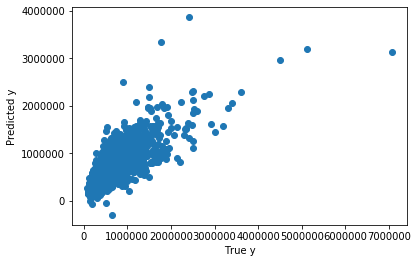

In [92]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

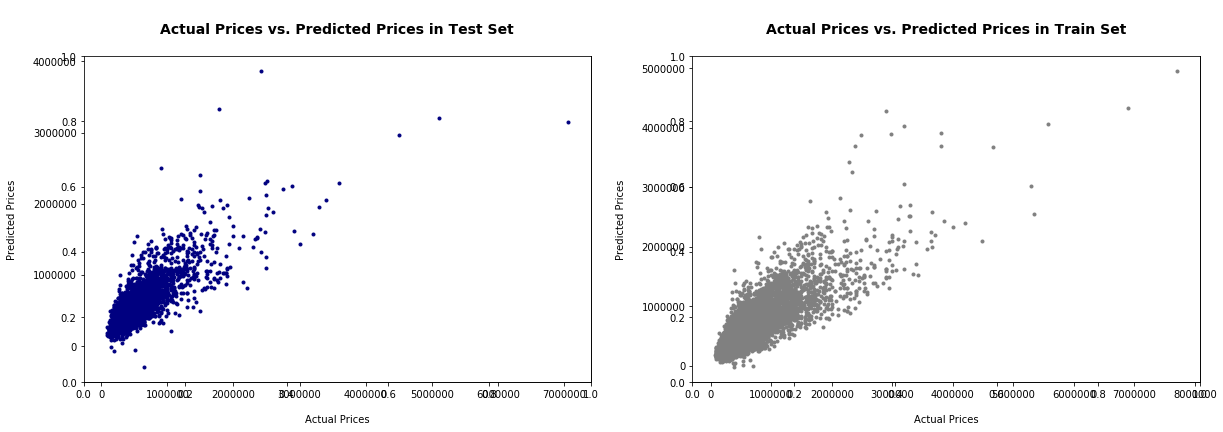

In [93]:
# apply the model to predict prices for test data
y_pred_test = lm.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(20, 6))

# visualize the differences between actual values and predicted values in TEST data
ax1 = fig.add_subplot(121)
ax1.scatter(y_test, y_pred_test, marker='.', c='navy')
ax1.set_xlabel("\nActual Prices")
ax1.set_ylabel("Predicted Prices\n")
ax1.set_title("\nActual Prices vs. Predicted Prices in Test Set\n", size=14, weight='bold')

# apply the model to predict prices for test data
y_pred_train = lm.predict(X_train)

# visualize the differences between actual values and predicted values in TRAIN data
ax2 = fig.add_subplot(122)
ax2.scatter(y_train, y_pred_train, marker='.', c='grey')
ax2.set_xlabel("\nActual Prices")
ax2.set_ylabel("Predicted Prices\n")
ax2.set_title("\nActual Prices vs. Predicted Prices in Train Set\n", size=14, weight='bold');

In [94]:
print ('Score:', model.score(X_test, y_test))  # R-squared is the default metric used by Sklearn.

Score: 0.6485866305877321


In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

cv_5_results = np.mean(cross_val_score(model, X, y, cv=5, scoring="r2"))
cv_10_results = np.mean(cross_val_score(model, X, y, cv=10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model, X, y, cv=20, scoring="r2"))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

0.674009732431618
0.6729931660157412
0.6733549013473253


In [96]:
mse_5_results = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error"))
mse_10_results = np.mean(cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error"))
mse_20_results = np.mean(cross_val_score(model, X, y, cv=20, scoring="neg_mean_squared_error"))

print(mse_5_results)
print(mse_10_results)
print(mse_20_results)

-43897681502.88288
-43856316781.50395
-43708123596.42595


Conclusion

<br>1. Location is an influential factor when it comes to the price of a home. We concluded that homes with a waterfront were the most pricey.
<br>2. The best time to sell a house is from late spring to early summer. This could be because of the weather up north, and that its when kids are getting out of school.
<br>3. Grade also has an effect on the sale price. The higher the grade, the higher you can set the price for selling a home.
<br>4. The square foot of the home, the amount of bedrooms/bathrooms, and whether a home was renovated or not also have effects on the sale price on a home.